## Lift a custom parcel

In [ ]:
%matplotlib inline

from skewt import SkewT

# Default Parcel
S=SkewT.Sounding("OTX_09082016.txt")
parcel=S.get_parcel(method='ml')
print parcel
print S.get_cape(*parcel)
S.plot_skewt()

# Custom Parcel
parcel=(800.0, 18.0, 3, 'ml')
S.make_skewt_axes(); S.add_profile();
S.lift_parcel(*parcel)
S.plot_skewt()

## Lift a parcel from a set altitude

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
from skewt import SkewT

df_snd = pd.read_csv('RAP_KEPH_130601_21z_F00.csv')

# Retrieve surface temperature
base_tmp = df_snd.loc[0]['TMP']
base_hgt = df_snd.loc[0]['HGT']

# Add the DALR

df_snd['DALR'] = base_tmp - ((df_snd.HGT-base_hgt)/1000)*9.8

# Virtual Temperature
df_snd['VIRTT'] = (df_snd.TMP+273.15)/(1 - 0.379*(6.11*np.power(((7.5*df_snd.DPT)/(237.7+df_snd.DPT)),10))/df_snd.level)-273.15

# Thermal Index
df_snd['TI'] = df_snd.TMP - df_snd.DALR

hght = df_snd[['HGT']].as_matrix().flatten()
pres = df_snd[['level']].as_matrix().flatten()
temp = df_snd[['TMP']].as_matrix().flatten()
dwpt = df_snd[['DPT']].as_matrix().flatten()
sknt = df_snd[['WSPD']].as_matrix().flatten()
drct = df_snd[['WDIR']].as_matrix().flatten()

mydata=dict(zip(('hght','pres','temp','dwpt','sknt', 'drct'),(hght, pres, temp, dwpt, sknt, drct)))
S=SkewT.Sounding(soundingdata=mydata)
S.plot_skewt(color='r')

In [ ]:
lvls = range(700,726)
hghts = np.empty(len(lvls))
hghts[:] = np.NAN
hghts[0] = 2827.12
hghts[-1] = 3106.7
df_hght = pd.DataFrame({'level': lvls, 'HGT': hghts}).interpolate()
print df_hght
df_lookup = df_hght.loc[df_hght['level'] == 710]
print df_lookup
hgt, level = df_lookup.iloc[0][['HGT','level']]
print level, hgt

In [ ]:
import os
import sys
import gdal
import math
from gdalconst import GA_ReadOnly

def open_raster():
    """
    This functions opens the raster file for processing
    """
    try:
        raster = gdal.Open('SRTM/srtm_12_03.tif', GA_ReadOnly)
    except RuntimeError, exception:
        print 'Unable to open '+'srtm_12_03.tif'
        print exception
        sys.exit(1)
    return raster

def retrieve_band(longitude, latitude):
    """
    This function will take in the given coordinates and return the
    elevation(band) NOTE: this only takes in Mercator value does not
    work with WGS84
    x - coordinates for the x axis or the longitude that users defined
    y - coordinates for the y axis or the latitude that user defined
    """
    if -180.0 > longitude > 180.0 or -90 > latitude > 90:
        return NULL_VALUE
    else:
        raster = open_raster()
        transform = raster.GetGeoTransform()
        x_offset = int((longitude - transform[0]) / transform[1])
        y_offset = int((latitude - transform[3]) / transform[5])
        band = raster.GetRasterBand(1)
        data = band.ReadAsArray(x_offset, y_offset, 1, 1)
        return data[0]
    
print retrieve_band(-121.7968, 48.0579)

## The Full Monthy

Start processing thermal 889c0cbe-399c-458b-98a9-bfe86a94c639
Calculating WX for thermal_id    889c0cbe-399c-458b-98a9-bfe86a94c639
flight_id                                 58200200
longitude                                 -119.654
latitude                                   47.4988
heigth                                        2875
vario                                      2.18519
alt_diff                                       589
time                           2012-06-17 23:19:48
Name: 0, dtype: object
Using SRTM/srtm_13_03.tif for 47.49875 -119.65375
Generating parcel at 584
(939.45652173913038, 20.873156521739148, 5.0221035974408679, 'interp', 584.0, 115.12160418040445, 19.130360126305135)
    level         HGT         TI  TI_ROUND
0    1000     52.7664  -1.589246      -2.0
1     975    262.3370  -0.947454      -1.0
2     950    487.7940  -0.165975      -0.0
3     925    717.8750   0.246818       0.0
4     900    952.3980  -0.175856      -0.0
5     875   1191.5000  -0.286657     

/usr/local/lib/python2.7/dist-packages/skewt/SkewT.py:769: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  dwpt[dwpt.mask]=dwpt.min()



---- Lifted Parcel Quantities ----
Parcel: INTERP
Ps  : 939.5hPa
TCs :  20.9C
TDs :   5.0C
-------------
Plcl: 741.8hPa
Tlcl:   1.7C
Plfc:   nanhPa
P_el:   nanhPa
CAPE:   0.0J
CIN:    0.0J


/usr/local/lib/python2.7/dist-packages/skewt/SkewT.py:672: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  dwpt[dwpt.mask]=-200



---- Lifted Parcel Quantities ----
Parcel: MU
Ps  :1000.0hPa
TCs :  24.5C
TDs :   8.0C
-------------
Plcl: 784.3hPa
Tlcl:   4.5C
Plfc: 640.3hPa
P_el: 504.6hPa
CAPE:  10.6J
CIN: -135.4J
thermal_id          889c0cbe-399c-458b-98a9-bfe86a94c639
flight_id                                       58200200
longitude                                       -119.654
latitude                                         47.4988
heigth                                              2875
vario                                            2.18519
alt_diff                                             589
time                                 2012-06-17 23:19:48
ground_temp_c                                    20.8732
ground_elev                                          584
ground_w_dir                                     115.122
ground_w_spd_kts                                 19.1304
lift_top                                          2199.7
H_lcl                                             2565.8
H_lfc           

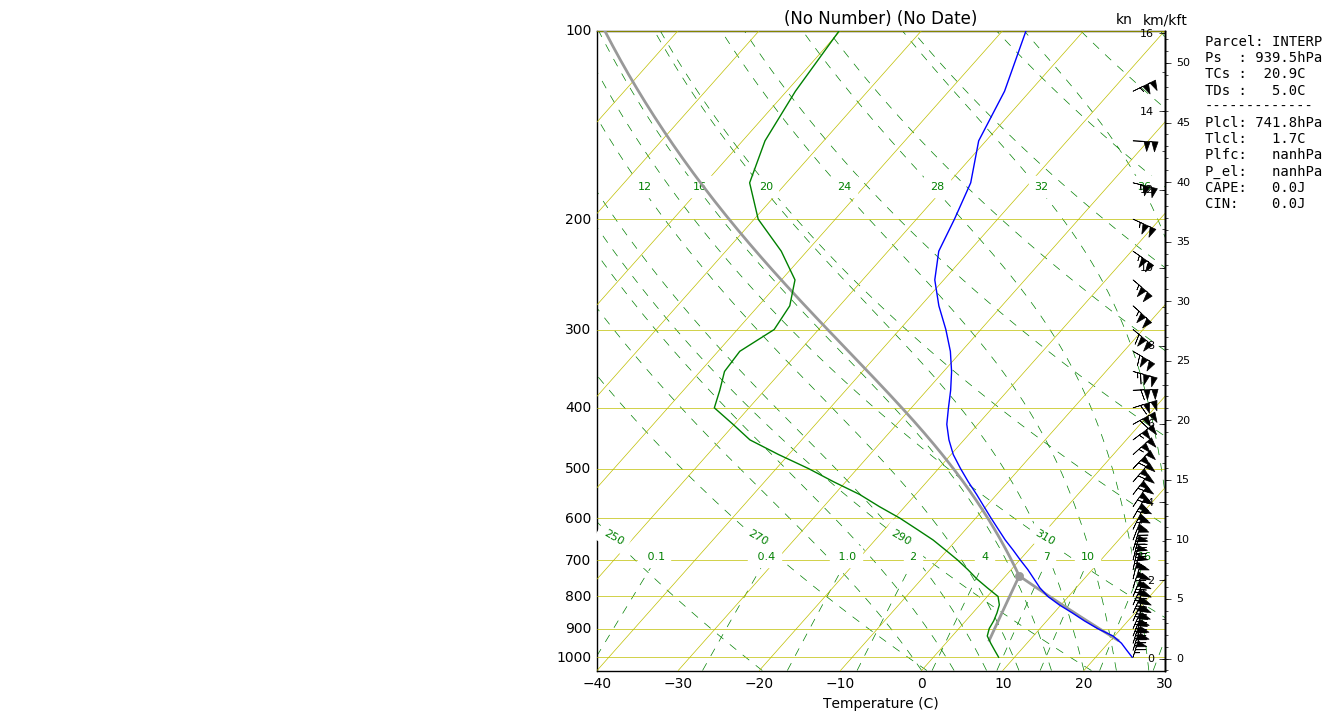

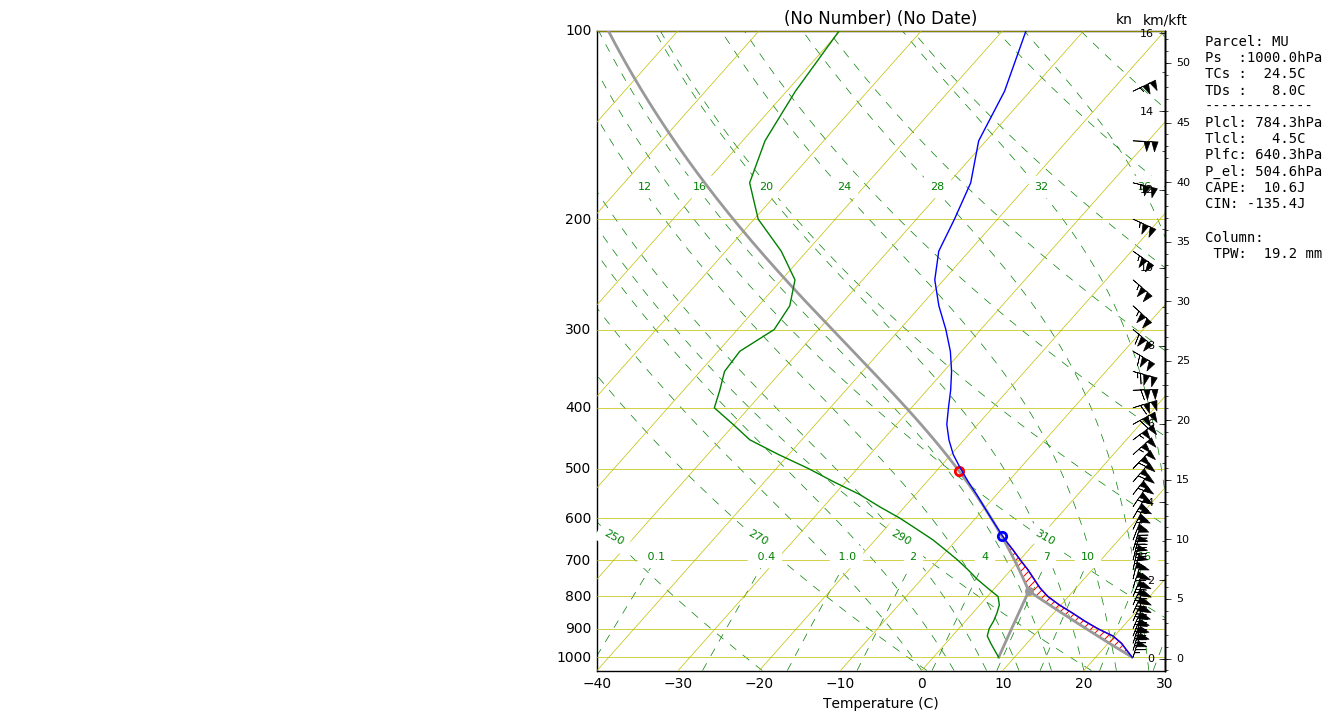

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import sys
import gdal
import math
from gdalconst import GA_ReadOnly
from skewt import SkewT
import os
import matplotlib.pyplot as plt


thermal_file = "/home/thomasvdv/RAP/CSV/{}.csv"

def open_raster(name):
    """
    This functions opens the raster file for processing
    """
    try:
        raster = gdal.Open(name, GA_ReadOnly)
    except RuntimeError, exception:
        print 'Unable to open ' + name
        print exception
        sys.exit(1)
    return raster


def retrieve_band(lat, lon):
    """
    This function will take in the given coordinates and return the
    elevation(band) NOTE: this only takes in Mercator value does not
    work with WGS84
    x - coordinates for the x axis or the longitude that users defined
    y - coordinates for the y axis or the latitude that user defined
    """
    if -125.0 < lon < -115.0 and 50.0 > lat > 45.0:
        name = 'SRTM/srtm_13_03.tif'
        if -125 < lon < -120:
            name = 'SRTM/srtm_12_03.tif'
        print 'Using {} for {} {}'.format(name, lat, lon)
        raster = open_raster(name)
        transform = raster.GetGeoTransform()
        x_offset = int((lon - transform[0]) / transform[1])
        y_offset = int((lat - transform[3]) / transform[5])
        band = raster.GetRasterBand(1)
        data = band.ReadAsArray(x_offset, y_offset, 1, 1)
        return data[0][0]
    else:
        print "Thermal out of bound: {} {}".format(lat, lon)
        return -1


# Dewpoint calculation adapted from ...
def dew_point(df_snd):
    df_snd['DPT_B'] = df_snd.TMP_C.apply(lambda x: 17.368 if x > 0 else 17.966)
    df_snd['DPT_C'] = df_snd.TMP_C.apply(lambda x: 238.88 if x > 0 else 247.15)

    pa = df_snd.RH / 100. * np.exp(df_snd.DPT_B * df_snd.TMP_C / (df_snd.DPT_C + df_snd.TMP_C))
    df_snd['DEWP_C'] = df_snd.DPT_C * np.log(pa) / (df_snd.DPT_B - np.log(pa))


def calc_hgt(df_snd, p):
    upper_hgt, upper_level = df_snd.loc[df_snd['level'] <= p].iloc[0][['HGT', 'level']]
    lower_hgt, lower_level = df_snd.loc[df_snd['level'] >= p].iloc[-1][['HGT', 'level']]
    lvls = range(int(upper_level), int(lower_level) + 1)
    hghts = np.empty(len(lvls))
    hghts[:] = np.NAN
    hghts[0] = upper_hgt
    hghts[-1] = lower_hgt
    df_hght = pd.DataFrame({'level': lvls, 'HGT': hghts}).interpolate()
    hgt, level = df_hght.loc[df_hght['level'] == int(p)].iloc[0][['HGT', 'level']]
    return hgt


def get_parcel_at_hgt(terrain, df_snd):
    print 'Generating parcel at {}'.format(terrain)
    upper_hgt, upper_level, upper_tmp_c, upper_dewp_c, upper_w_dir, upper_w_spd_kts = df_snd.loc[df_snd['HGT'] >= terrain].iloc[0][
        ['HGT', 'level', 'TMP_C', 'DEWP_C','W_DIR','W_SPD_KTS']]
    df_lwr = df_snd.loc[df_snd['HGT'] <= terrain]
    if len(df_lwr.index > 0):
        lower_hgt, lower_level, lower_tmp_c, lower_dewp_c, lower_w_dir, lower_w_spd_kts = df_lwr.iloc[-1][
            ['HGT', 'level', 'TMP_C', 'DEWP_C','W_DIR','W_SPD_KTS']]
        hgts = range(int(lower_hgt), int(upper_hgt) + 1)
        interp = np.empty(len(hgts))
        interp[:] = np.NAN
        levels = list(interp)
        levels[0] = lower_level
        levels[-1] = upper_level
        temps = list(interp)
        temps[0] = lower_tmp_c
        temps[-1] = upper_tmp_c
        dewpts = list(interp)
        dewpts[0] = lower_dewp_c
        dewpts[-1] = upper_dewp_c
        wdirs = list(interp)
        wdirs[0] = lower_w_dir
        wdirs[-1] = upper_w_dir
        wkts = list(interp)
        wkts[0] = lower_w_spd_kts
        wkts[-1] = upper_w_spd_kts
        df_interp = pd.DataFrame({'HGT': hgts, 'level': levels, 'TMP_C': temps, 'DEWP_C': dewpts, 'W_DIR': wdirs, 'W_SPD_KTS': wkts}).interpolate()
        hgt, level, tmp_c, dewp_c, w_dir, w_spd_kts = df_interp.loc[df_interp['HGT'] == int(terrain)].iloc[0][
            ['HGT', 'level', 'TMP_C', 'DEWP_C','W_DIR','W_SPD_KTS']]
        return (level, tmp_c, dewp_c, 'interp', hgt, w_dir, w_spd_kts)
    else:
        return (upper_level, upper_tmp_c, upper_dewp_c, 'lowest', upper_hgt, upper_w_dir, upper_w_spd_kts)


def strip_to_terrain(df_snd, parcel):
    level = parcel[0]
    # Reduce the sounding to terrain height.
    return df_snd.loc[df_snd['level'] <= level].reset_index(drop=True)

def process_thermal_wx(thermal):

    print 'Calculating WX for {}'.format(thermal)

    lon = thermal.longitude
    lat = thermal.latitude

    terrain = retrieve_band(lat, lon)

    if terrain == -1:
        return

    df = pd.read_csv(thermal_file.format(thermal.thermal_id))

    if len(df.index) < 185:
        df.to_csv("/home/thomasvdv/RAP/CSV/{}.error".format(thermal.thermal_id))
        return

    df['paramId'] = pd.to_numeric(df.paramId, errors='coerce')
    df['value'] = pd.to_numeric(df.value, errors='coerce')
    df['level'] = pd.to_numeric(df.level, errors='coerce')

    # Geopotential Height
    df_hgt = df.loc[df['paramId'] == 156][0:37]
    df_hgt = df_hgt.rename(columns={'value': 'HGT'}).drop('paramId', 1)

    # Temperature
    df_tmp = df.loc[df['paramId'] == 130][0:37]
    df_tmp = df_tmp.rename(columns={'value': 'TMP_K'}).drop('paramId', 1)

    # Relative Humidity
    df_rh = df.loc[df['paramId'] == 157][0:37]
    df_rh = df_rh.rename(columns={'value': 'RH'}).drop('paramId', 1)

    # U component of wind
    df_uw = df.loc[df['paramId'] == 131][0:37]
    df_uw = df_uw.rename(columns={'value': 'W_U'}).drop('paramId', 1)

    # V component of wind
    df_vw = df.loc[df['paramId'] == 132][0:37]
    df_vw = df_vw.rename(columns={'value': 'W_V'}).drop('paramId', 1)

    # Ground Temperature
    # df_gtmp = df.loc[df['paramId'] == 167]

    dfs = [df_hgt, df_tmp, df_rh, df_uw, df_vw]

    df_snd = reduce(lambda left, right: pd.merge(left, right, on='level'), dfs)

    # Wind Speed
    df_snd['W_SPD_MS'] = (df_snd.W_U ** 2 + df_snd.W_V ** 2) ** (0.5)
    df_snd['W_SPD_KTS'] = df_snd.W_SPD_MS * 1.94384

    # Wind Direction
    df_snd['W_DIR'] = np.arctan2(df_snd.W_U, df_snd.W_V) * (180. / np.pi)

    # Temperature in Celcius
    df_snd['TMP_C'] = df_snd.TMP_K - 273.15

    # Dewpoint Temperature
    dew_point(df_snd)

    # Get the lift parcel for the terrain altitude
    parcel = get_parcel_at_hgt(terrain, df_snd)
    #df_snd = strip_to_terrain(df_snd, parcel)


    # Retrieve surface temperature
    print parcel
    base_tmp = parcel[1]
    base_hgt = parcel[4]

    thermal['ground_temp_c'] = base_tmp
    thermal['ground_elev'] = base_hgt
    thermal['ground_w_dir'] = parcel[5]
    thermal['ground_w_spd_kts'] = parcel[6]

    # Add the DALR

    df_snd['DALR'] = base_tmp - ((df_snd.HGT - base_hgt) / 1000) * 9.8

    # Virtual Temperature
    df_snd['VIRTT'] = (df_snd.TMP_K) / (
    1 - 0.379 * (6.11 * np.power(((7.5 * df_snd.DEWP_C) / (237.7 + df_snd.DEWP_C)), 10)) / df_snd.level) - 273.15

    # Thermal Index
    df_snd['TI'] = (df_snd.TMP_C - df_snd.DALR)
    df_snd['TI_ROUND'] = df_snd['TI'].round()

    # Top of lift
    lift_top = np.NAN
    df_lift = df_snd.loc[df_snd['TI_ROUND'] <= 0]
    if len(df_lift.index > 0) :
        lift_top = df_lift.iloc[-1]['HGT']
        
    print df_snd[['level','HGT','TI', 'TI_ROUND']]

    thermal['lift_top'] = lift_top

    hght = df_snd[['HGT']].as_matrix().flatten()
    pres = df_snd[['level']].as_matrix().flatten()
    temp = df_snd[['TMP_C']].as_matrix().flatten()
    dwpt = df_snd[['DEWP_C']].as_matrix().flatten()
    sknt = df_snd[['W_DIR']].as_matrix().flatten()
    drct = df_snd[['W_SPD_KTS']].as_matrix().flatten()

    mydata = dict(zip(('hght', 'pres', 'temp', 'dwpt', 'sknt', 'drct'), (hght, pres, temp, dwpt, sknt, drct)))
    S = SkewT.Sounding(soundingdata=mydata)
    S.make_skewt_axes();
    S.add_profile();
    S.lift_parcel(*parcel[0:4])
    Plcl, Plfc, P_el, CAPE, CIN = S.get_cape(*parcel[0:4])
    S.plot_skewt()

    Hlcl = calc_hgt(df_snd, Plcl)
    thermal['H_lcl'] = Hlcl

    Hlfc = Plfc
    if not (math.isnan(Plfc)):
        Hlfc = calc_hgt(df_snd, Plfc)
    thermal['H_lfc'] = Hlfc

    H_el = P_el
    if not (math.isnan(P_el)):
        H_el = calc_hgt(df_snd, P_el)
    thermal['H_el'] = H_el

    thermal['CAPE'] = CAPE
    thermal['CIN'] = CIN

    return thermal


if __name__ == '__main__':
    # Find all thermals in the thermals directory.
    # Process each one and add the result to the WX folder
    output = "/home/thomasvdv/OLC/CSV/thermals_wx.csv"
    thermal_idx = "/home/thomasvdv/OLC/CSV/thermals.csv"

    df_thermals = pd.read_csv(thermal_idx)
    df_thermals_wx = pd.DataFrame()
    for idx, thermal in df_thermals.iterrows():
        thermal_id = thermal.thermal_id
        if os.path.isfile("/home/thomasvdv/RAP/CSV/{}.csv".format(thermal_id)):
            print 'Start processing thermal {}'.format(thermal_id)
            thermal = process_thermal_wx(thermal)
            print thermal
            df_thermals_wx = df_thermals_wx.append(thermal)
        else:
            print 'Skipping thermal {}'.format(thermal_id)

    df_thermals_wx.to_csv(output, index=False)